The Office! What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.

In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: datasets/office_episodes.csv, which was downloaded from Kaggle [here](https://www.kaggle.com/nehaprabhavalkar/the-office-dataset).

This dataset contains information on a variety of characteristics of each episode. In detail, these are:

### ***datasets/office_episodes.csv***

* `episode_number`: Canonical episode number.
* `season`: Season in which the episode appeared.
* `episode_title`: Title of the episode.
* `description`: Description of the episode.
* `ratings`: Average IMDB rating.
* `votes`: Number of votes.
* `viewership_mil`: Number of US viewers in millions.
* `duration`: Duration in number of minutes.
* `release_date`: Airdate.
* `guest_stars`: Guest stars in the episode (if any).
* `director`: Director of the episode.
* `writers`: Writers of the episode.
* `has_guests`: True/False column for whether the episode contained guest stars.
* `scaled_ratings`: The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).

1. Create a matplotlib **scatter plot** of the data that contains the following attributes:

* Each episode's **episode number plotted along the x-axis**
* Each episode's **viewership (in millions) plotted along the y-axis**
* A **color scheme** reflecting the `scaled_ratings` (not the regular ratings) of each episode, such that:
  * Ratings < 0.25 are colored `"red"`
  * Ratings >= 0.25 and < 0.50 are colored `"orange"`
  * Ratings >= 0.50 and < 0.75 are colored `"lightgreen"`
  * Ratings >= 0.75 are colored `"darkgreen"`
* A **sizing system**, such that episodes with guest appearances have a marker size of `250` and episodes without are sized `25`
* A `title`, reading `"Popularity, Quality, and Guest Appearances on the Office"`
* An `x-axis` label reading `"Episode Number"`
* A `y-axis` label reading `"Viewership (Millions)"`

2. Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable `top_star` (e.g. `top_star = "Will Ferrell"`).

### ***Important!***
To test your `matplotlib` plot, you will need to initalize a `matplotlib.pyplot` `fig` object, which you can do using the code `fig = plt.figure()` (provided you have imported `matplotlib.pyplot as plt`). In addition, in order to test it correctly, **please make sure to specify your plot (including the type, data, labels, etc) in the same cell as the one you initialize your figure** (`fig`)! *You are still free to use other cells to load data, experiment, and answer Question 2*.

In addition, if you want to be able to see a larger version of your plot, you can set the figure size parameters using this code (provided again you have imported `matplotlib.pyplot` as `plt`):

```
plt.rcParams['figure.figsize'] = [11, 7]
```

### ***Bonus Step!***

Although it was not taught in Intermediate Python, a useful skill for visualizing different data points is to use a different marker. You can learn more about them via the [Matplotlib documentation](https://matplotlib.org/api/markers_api.html) or via our course [Introduction to Data Visualization with Matplotlib](https://learn.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib). Thus, as a bonus step, try to differentiate guest appearances not just with size, but also with a star!

All other attributes still apply (data on the axes, color scheme, sizes for guest appearances, title, and axis labels).

# ***Without using color and size schemes***

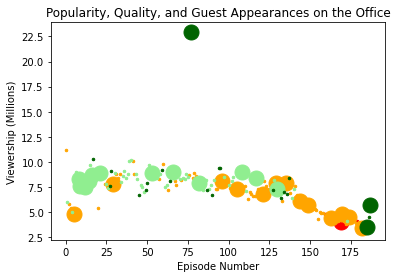

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv('the_office_series.csv')

fig, ax = plt.subplots()

ax.plot(df.loc[(df['scaled_ratings'] < 0.25) & (df['has_guests']==True)]['episode_number'], df.loc[(df['scaled_ratings'] < 0.25) & (df['has_guests']==True)]['viewership_mil'], color='red', marker='.', linestyle='None', markersize=30)                                                                                            
ax.plot(df.loc[(df['scaled_ratings'] < 0.25) & (df['has_guests']==False)]['episode_number'], df.loc[(df['scaled_ratings'] < 0.25) & (df['has_guests']==False)]['viewership_mil'], color='red', marker='.', linestyle='None', markersize=5)

ax.plot(df.loc[(0.25 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.50) & (df['has_guests']==True)]['episode_number'], df.loc[(0.25 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.50) & (df['has_guests']==True)]['viewership_mil'], color='orange', marker='.', linestyle='None', markersize=30)
ax.plot(df.loc[(0.25 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.50) & (df['has_guests']==False)]['episode_number'], df.loc[(0.25 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.50) & (df['has_guests']==False)]['viewership_mil'], color='orange', marker='.', linestyle='None', markersize=5)


ax.plot(df.loc[(0.50 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.75) & (df['has_guests']==True)]['episode_number'], df.loc[(0.50 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.75) & (df['has_guests']==True)]['viewership_mil'], color='lightgreen', marker='.', linestyle='None', markersize=30)
ax.plot(df.loc[(0.50 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.75) & (df['has_guests']==False)]['episode_number'], df.loc[(0.50 <= df['scaled_ratings']) & (df['scaled_ratings'] < 0.75) & (df['has_guests']==False)]['viewership_mil'], color='lightgreen', marker='.', linestyle='None', markersize=5)

ax.plot(df.loc[(df['scaled_ratings'] >= 0.75) & (df['has_guests']==True)]['episode_number'], df.loc[(df['scaled_ratings'] >= 0.75) & (df['has_guests']==True)]['viewership_mil'], color='darkgreen', marker='.', linestyle='None', markersize=30)
ax.plot(df.loc[(df['scaled_ratings'] >= 0.75) & (df['has_guests']==False)]['episode_number'], df.loc[(df['scaled_ratings'] >= 0.75) & (df['has_guests']==False)]['viewership_mil'], color='darkgreen', marker='.', linestyle='None', markersize=5)
ax.set_xlabel("Episode Number")
ax.set_ylabel("Viewership (Millions)")
ax.set_title("Popularity, Quality, and Guest Appearances on the Office")
plt.show()


# ***With color and size schemes***

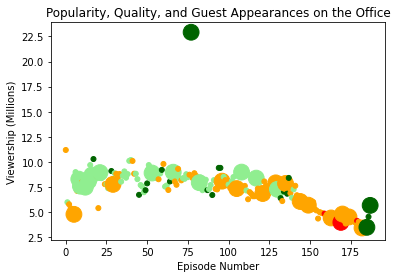

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv('the_office_series.csv')

# Create a color_scheme 
colors = []

# Iterate over rows of df
for _, row in df.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append("red")
    elif 0.25 <= row['scaled_ratings'] < 0.50:
        colors.append("orange")
    elif 0.50 <= row['scaled_ratings'] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")
        
# Create a sizing system

sizes = []

for _, row in df.iterrows():
    if row['has_guests'] == True:
        sizes.append(250)
    else:
        sizes.append(25)
        
fig, ax = plt.subplots()

ax.scatter(df["episode_number"], df["viewership_mil"], c=colors, s=sizes)
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [8]:
display(df[df['has_guests']==True][['guest_stars', 'viewership_mil']].sort_values(by='viewership_mil', ascending=False).head())
top_star = "Cloris Leachman"

,guest_stars,viewership_mil
77,"Cloris Leachman, Jack Black, Jessica Alba",22.91
108,Mellisa Rauch,9.00
66,Wendi McLendon-Covey,8.99
21,Conan O'Brien,8.95
53,Kevin McHale,8.91
